# pyArgus 
## Demonstation and documentation for the radiation pattern plot
pyArgus
辐射模式图的演示和文档
License: GPLv3
Author: Tamás Pető

In [14]:
from pyargus.antennaArrayPattern import array_rad_pattern_plot
from pyargus.tests.patternPlotTest import demo_ULA_plot, demo_UCA_plot_obsolete

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The array factor of an $N$ element antenna array can be calculated usign the following formula:
元件天线阵列的阵列系数可以用下面的公式计算出来：
$$ AF(\theta) = \sum_{i=1}^N w_i e^{-j\beta r},$$ 
where $\beta$ is the wavenumber and $r$ is the distance between the observation point and the $ith$ antenna element.
$ \beta = 2 \pi / \lambda$ and, $\lambda$ is the wavelength of the processed signal. The $r$ distance is calculated as follows:
$$ r= \sqrt{(x_0 - x_i)^2 + (y_0 - y_i)^2 +(z_0-z_i)^2}  $$

if $x_0$, $y_0$ and $z_0$ denotes the coordinates of the observation point and $x_i$,$y_i$ and $z_i$ denotes the coordinates of the $i$th antenna element. In order to take into account that the observer is in the farfield of the antenna array and the impinging signal is a plane wave the observation point is choosed to far away from the antenna system.
The array factor of the antenna system is calculted by moving the observation point around the antenna system on a circle  and calculating the expression of the AF continuously.
如果 $x_0$、$y_0$ 和 $z_0$ 表示观察点的坐标，$x_i$、$y_i$ 和 $z_i$ 表示第 i 个天线元件的坐标。考虑到观察者位于天线阵列的远场，而冲击信号是平面波，因此观察点选择在远离天线系统的地方。
天线系统的阵列因子是通过将观测点绕天线系统移动一圈并连续计算阵列因子的表达式计算出来的。

In the formula of the Array Factor (AF), $w_i$ is the $i$th coordinate of the $\textbf{w}$ weight coefficient vector.
The rad_pattern_plot function implements the above described function. The array_alignment parameter of the function describes the alignment of the antenna system elements in the $x,y$ plane. **Note that, the antenna system which is described by the array_alignment parameter should be placed in a way to have its center in the origo.**
在阵列因子（AF）公式中，$w_i$ 是 $\textbf{w}$ 权重系数向量的第 i 个坐标。
rad_pattern_plot 函数实现了上述功能。函数的 array_alignment 参数描述了天线系统元素在 $x,y$ 平面上的排列。**注意，用 array_alignment 参数描述的天线系统应将其中心置于原点**。

For uniformly spaced linear antenna array using the plane wave approximation the array factor can be calculted using the following formula:
$$ AF(\theta) = \sum_{i=1}^N w_i e^{-j\beta d cos(\theta)},$$ , 
where $d$ denotes the distance between the antenna elements.
对于使用平面波近似的均匀间隔线性天线阵列，阵列因数可通过以下公式计算：
$$ AF(\theta) = \sum_{i=1}^N w_i e^{-j\beta d cos(\theta)},$$ 、
其中，$d$ 表示天线元件之间的距离。

The following demonstation plot illustrates the calculated radiation pattern for a 4 element linear antenna array with an inter-element spacing of half wavelength.
下面的示意图说明了 4 个元素线性天线阵列的计算辐射模式，元素间距为半波长。

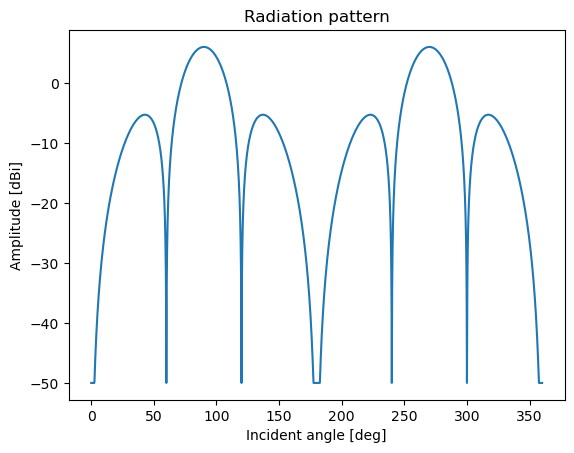

In [16]:
N = 4  # Number of antenna elements in the antenna system
d = 0.5  # Antenna element spacing

# Antenna element positions for ULA
x_coords = np.arange(N)*d - (N-1)*d/2
y_coords = np.zeros(N)
array_alignment = np.array((x_coords, y_coords))

rad_pattern = array_rad_pattern_plot(array_alignment = array_alignment)


Lets change the weight coefficients to $ \textbf{w} = \begin{bmatrix} 1 &-1 & 1 & -1 \end{bmatrix} $. With setting this coefficients we should see a null in the radiation pattern at $\theta = 90$

让我们把权重系数改成 $ （textbf{w} = （begin{bmatrix}） 1 &-1 & 1 & -1 （end{bmatrix}） $. 设置这个系数后，我们应该能看到在 $\theta = 90$ 处的辐射模式为空

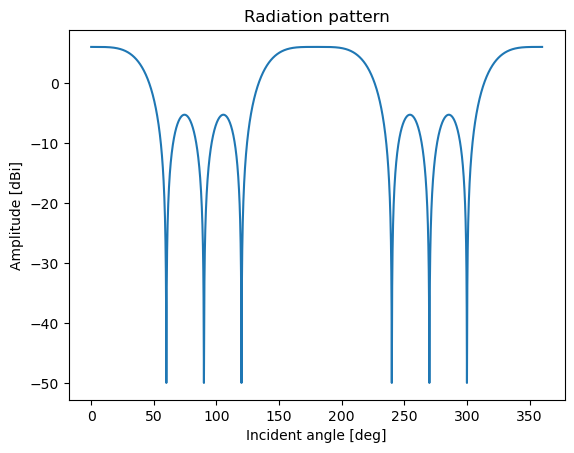

In [21]:
w = np.array([1,-1,1,-1],dtype = complex)
rad_pattern = array_rad_pattern_plot(w=w, array_alignment = array_alignment)

One can calculate the weight coefficient vector to steer the main lobe direction to the desired position ($\theta$).
通过计算权重系数矢量，可以将主叶片方向引导到所需位置（ ）。


In [18]:
theta = 70  # Sets this value to steer the main beam position
for i in np.arange(0,N,1):
     w[i] = np.exp(i* 1j* 2*np.pi * d *np.cos(np.deg2rad(theta)))          
array_rad_pattern_plot(w=w, array_alignment = array_alignment)

NameError: name 'w' is not defined

We can also change the dynamic range of the radiation pattern plot by setting the "log_scale_min" paramter.

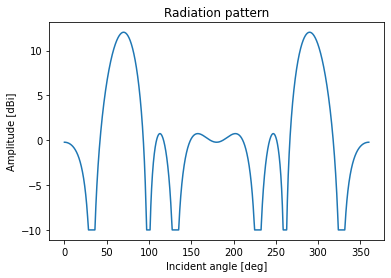

In [6]:
rad_pattern = array_rad_pattern_plot(w=w, array_alignment = array_alignment, log_scale_min=-10)

This demonstration code is wrapped by the "demo_ULA_plot" function in the "tests" directory. Let us call it with a different main beam position and antenna array size.

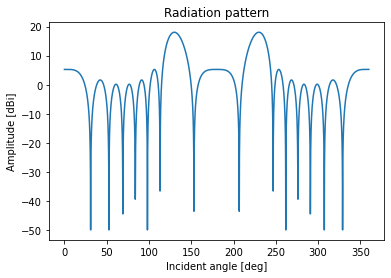

In [7]:
demo_ULA_plot(N=8, d=0.5, theta=130)

## Single element pattern

The following demonstration shows how you can take into consideration the radiation pattern of the single radiating element. The *array_rad_pattner_plot* function has a *sing_elem_patterns* parameter which can be used to specify the radiation characteristics of every element in the system. It should be a matrix having $M$ columns and $D$ rows, where $M$ is the number of antenna elemenets in the system and $D$ is the number of angle points in the radiation patterns.

The given radiation patterns should cover the entire angle range from $0$ deg to $360$ deg in a way to have their boresight direction at $\theta = 90^\circ$. Gain values in the specified array should be in [dBi]. As an example the following script will show you how to use the radiation pattern exported from CST Microwave.

Using the default configuration CST Microwave Studio exports the calculated radiation pattern into an ASCII file that has the following columns (see: pyargus/tests/sing_elem_pattern.txt):

- Theta [deg.]  
- Phi   [deg.]  
- Abs(Gain)[dB]   
- Abs(Theta)[dB]  
- Phase(Theta)[deg.]  
- Abs(Phi  )[dB]  
- Phase(Phi  )[deg.]  
- Ax.Ratio[dB]

To plot the overall radiation pattern of an antenna system we need the third column from the file, which is the Abs(Gain)[dB]. Also note that in the exported file the first, angle column takes values on the following range: [0..180,-175..-5]. However, the *array_rad_pattern_plot* function expects angle-gain value pairs on the [0..360] range, hence we have to preprocess the available radiation pattern.


Text(0, 0.5, 'Gain [dBi]')

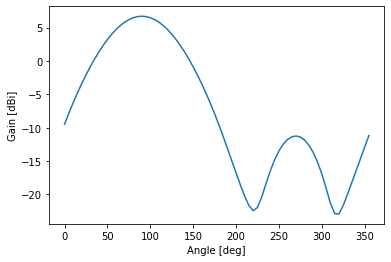

In [35]:
# Import external modules

# Set the location of the example radiation pattern file
import os
import sys
current_path  = os.getcwd()
root_path     = os.path.dirname(current_path)
test_path     = os.path.join(root_path, "tests",)
pattern_fname = "sing_elem_pattern.txt"
pattern_file  = os.path.join(test_path, pattern_fname)

pattern_file
# Import CST radiation pattern file (skip the 2 header rows)
cst_rad_pattern = np.loadtxt(fname=pattern_file, skiprows=2)

# Shift the pattern to have the boresight direction at 90 deg
cst_rad_pattern[:,2] = np.roll(cst_rad_pattern[:,2],90)

# Let us check the imported and preprocessed radiation pattern
thetas =np.arange(0,360,0.1) # Generate incident angle values 
plt.plot(np.arange(0,360,5), cst_rad_pattern[:,2])
plt.xlabel("Angle [deg]")
plt.ylabel("Gain [dBi]")

INFO: Single element radiation patterns have fitted with interpolation
INFO: Single element radiation patterns have fitted with interpolation


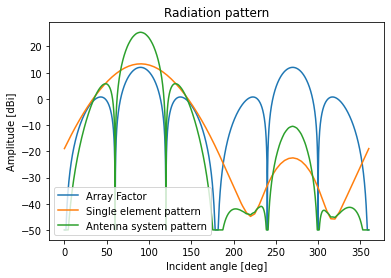

In [44]:
#Generate singel element radiation pattern array. (All elements will have the same pattern)
angle_points = len(cst_rad_pattern[:,0]) 
sing_elem_patterns = np.zeros((N, angle_points+1 ))
for n in range(N):
    sing_elem_patterns[n,0:angle_points] = cst_rad_pattern[:,2]
    sing_elem_patterns[n,angle_points]   = sing_elem_patterns[n,0] # extend radiation pattern to have points at 0..360
    
# Create empty Figure object to plot on
figure = plt.figure()        
ax = figure.add_subplot(111)


# Plot patterns
array_rad_pattern_plot(array_alignment = array_alignment, axes=ax)
array_rad_pattern_plot(array_alignment = np.array(([0], [0])), sing_elem_patterns=sing_elem_patterns, axes=ax)
array_rad_pattern_plot(array_alignment = array_alignment, sing_elem_patterns=sing_elem_patterns, axes=ax)
plt.legend(['Array Factor','Single element pattern','Antenna system pattern'])
